In [3]:
import sqlite3
connection = sqlite3.connect('./vivino.db')
cursor = connection.cursor()

In [131]:
list_of_countries = []
for x in cursor.execute('''SELECT name FROM countries'''):
    list_of_countries.append(x[0])
print(list_of_countries)

['Italie', 'France', 'États-Unis', 'Espagne', 'Portugal', 'Australie', 'Hongrie', 'Afrique du Sud', 'Allemagne', 'Chili', 'Moldavie', 'Argentine', 'Grèce', 'Israël', 'Roumanie', 'Croatie', 'Suisse']


In [135]:
import pandas as pd

list_of_countries = []
for x in cursor.execute('''SELECT name FROM countries'''):
    list_of_countries.append(x[0])
print(list_of_countries)

data = []

for country in list_of_countries:
    query1 = f'''
    SELECT COUNT(DISTINCT vintages.name)
    FROM countries
    JOIN regions ON regions.country_code = countries.code
    JOIN wines ON wines.region_id = regions.id
    JOIN vintages ON vintages.wine_id = wines.id
    WHERE countries.name = '{country}'
    '''

    query2 = f'''
    SELECT COUNT(DISTINCT wines.name)
    FROM countries
    JOIN regions ON regions.country_code = countries.code
    JOIN wines ON wines.region_id = regions.id
    WHERE countries.name = '{country}'
    '''

    wine_count = 0
    vintage_count = 0

    for row in cursor.execute(query2):
        wine_count = row[0]

    for row in cursor.execute(query1):
        vintage_count = row[0]

    data.append([country, wine_count, vintage_count, wine_count + vintage_count])

    print(f"Country: {country}")
    print(f"Total Wine Count: {wine_count}")
    print(f"Total Vintage Count: {vintage_count}")
    print(f"Total count in {country}: {wine_count + vintage_count}")
    print()
df = pd.DataFrame(data, columns=['Country', 'Wine Count', 'Vintage Count', 'Total Count'])
print(df)

['Italie', 'France', 'États-Unis', 'Espagne', 'Portugal', 'Australie', 'Hongrie', 'Afrique du Sud', 'Allemagne', 'Chili', 'Moldavie', 'Argentine', 'Grèce', 'Israël', 'Roumanie', 'Croatie', 'Suisse']
Country: Italie
Total Wine Count: 318
Total Vintage Count: 902
Total count in Italie: 1220

Country: France
Total Wine Count: 252
Total Vintage Count: 721
Total count in France: 973

Country: États-Unis
Total Wine Count: 68
Total Vintage Count: 112
Total count in États-Unis: 180

Country: Espagne
Total Wine Count: 90
Total Vintage Count: 131
Total count in Espagne: 221

Country: Portugal
Total Wine Count: 26
Total Vintage Count: 31
Total count in Portugal: 57

Country: Australie
Total Wine Count: 12
Total Vintage Count: 16
Total count in Australie: 28

Country: Hongrie
Total Wine Count: 9
Total Vintage Count: 14
Total count in Hongrie: 23

Country: Afrique du Sud
Total Wine Count: 22
Total Vintage Count: 32
Total count in Afrique du Sud: 54

Country: Allemagne
Total Wine Count: 14
Total Vin

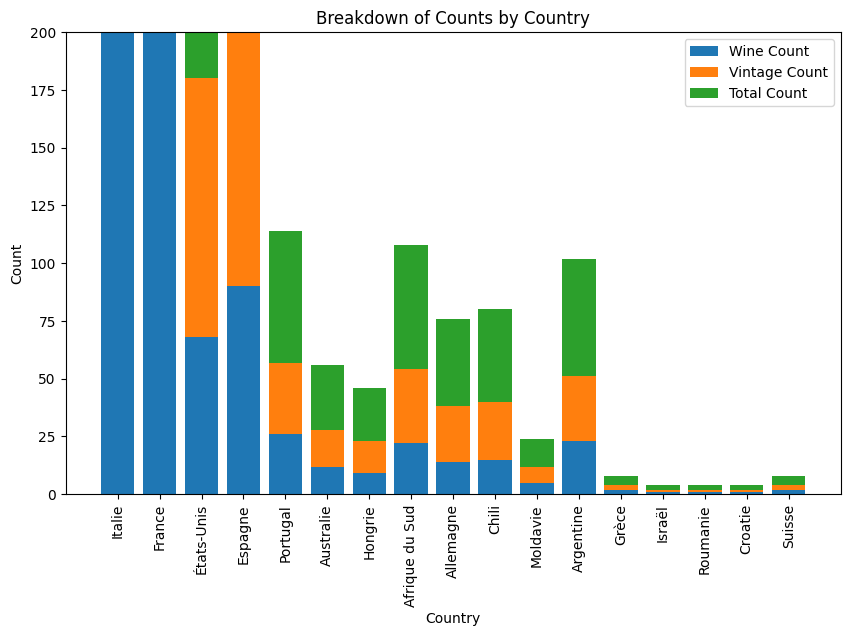

In [150]:

countries = df['Country']
wine_counts = df['Wine Count']
vintage_counts = df['Vintage Count']
total_counts = df['Total Count']

plt.figure(figsize=(10, 6))
plt.bar(countries, wine_counts, label='Wine Count')
plt.bar(countries, vintage_counts, bottom=wine_counts, label='Vintage Count')
plt.bar(countries, total_counts, bottom=[i+j for i,j in zip(wine_counts, vintage_counts)], label='Total Count')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Breakdown of Counts by Country')
plt.ylim(0, 200)


plt.legend()
plt.xticks(rotation=90)
plt.show()

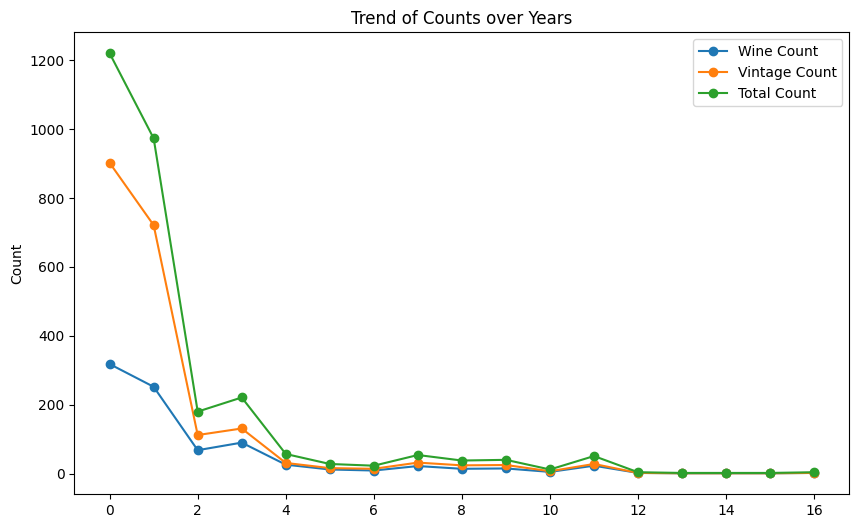

In [146]:
countries = df['Country']
wine_counts = df['Wine Count']
vintage_counts = df['Vintage Count']
total_counts = df['Total Count']


plt.figure(figsize=(10, 6))
plt.plot( wine_counts, marker='o', label='Wine Count')
plt.plot( vintage_counts, marker='o', label='Vintage Count')
plt.plot( total_counts, marker='o', label='Total Count')

plt.ylabel('Count')
plt.title('Trend of Counts over Years')
plt.legend()

plt.show()

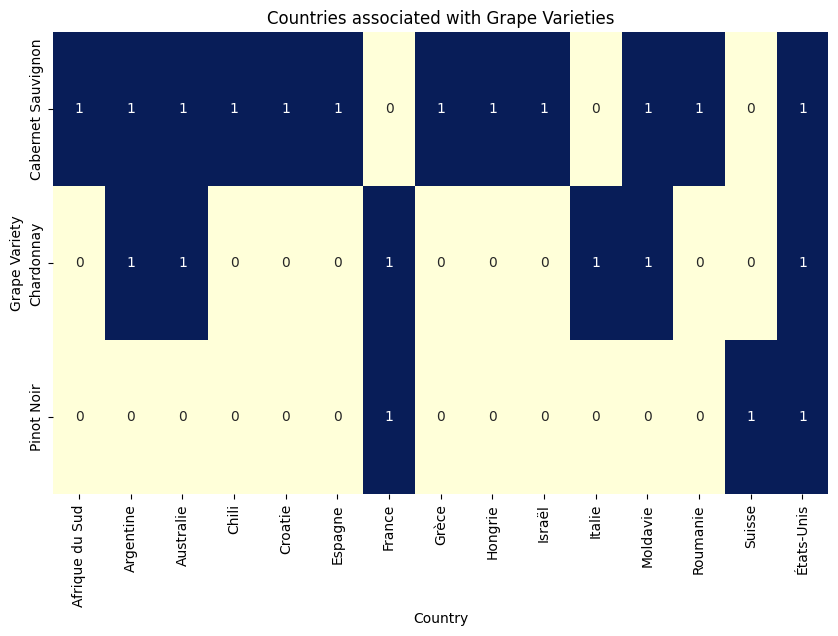

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

connection = sqlite3.connect('./vivino.db')
cursor = connection.cursor()

queries = {
    'Cabernet Sauvignon': """
        SELECT countries.name
        FROM countries
        JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
        JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
        WHERE grapes.name = 'Cabernet Sauvignon'
    """,
    'Chardonnay': """
        SELECT countries.name
        FROM countries
        JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
        JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
        WHERE grapes.name = 'Chardonnay'
    """,
    'Pinot Noir': """
        SELECT countries.name
        FROM countries
        JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
        JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
        WHERE grapes.name = 'Pinot Noir'
    """
}

data = []
for grape_variety, query in queries.items():
    cursor.execute(query)
    results = cursor.fetchall()
    for row in results:
        data.append((grape_variety, row[0]))

df = pd.DataFrame(data, columns=['Grape Variety', 'Country'])

# Reshape the DataFrame using pivot_table
df_pivot = pd.pivot_table(df, index='Grape Variety', columns='Country', aggfunc=len, fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu', cbar=False)

# Set the title and labels
plt.title("Countries associated with Grape Varieties")
plt.xlabel("Country")
plt.ylabel("Grape Variety")

# Display the chart
plt.show()

# Close the database connection
connection.close()

In [71]:
query = """
SELECT countries.name
from countries
JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
WHERE grapes.name = 'Merlot'
"""
cursor.execute(query)
cursor.fetchall()

[('Italie',),
 ('France',),
 ('Hongrie',),
 ('Afrique du Sud',),
 ('Chili',),
 ('Moldavie',),
 ('Grèce',),
 ('Israël',),
 ('Roumanie',),
 ('Croatie',),
 ('Suisse',)]

In [72]:
query = """
SELECT countries.name
from countries
JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
WHERE grapes.name = 'Shiraz/Syrah'
"""
cursor.execute(query)
cursor.fetchall()

[('Australie',), ('Afrique du Sud',), ('Israël',)]

In [108]:
# wine and vintage to get price of 15 wines 
# wines.acidity,wines.intensity,wines.sweetness
# no discount - vintages.price_discount_percentage,
q = """
SELECT distinct wines.name AS wine_name,wines.user_structure_count, vintages.price_euros,  vintages.bottle_volume_ml
FROM vintages
JOIN wines ON wines.id = vintages.wine_id
WHERE wines.name IN ('Cabernet Sauvignon', 'Special Selection Cabernet Sauvignon', 'Chloe Chardonnay', 'Reserve Chardonnay', 'Bentrock Vineyard Chardonnay', 'Finn Pinot Noir', 'Grace Vineyard Pinot Noir', 'Mark Bradford Vineyard Pinot Noir', 'Alpine Hillside Pinot Noir')
 
ORDER BY wines.name ASC
"""
cursor.execute(q)
cursor.fetchall()

[('Alpine Hillside Pinot Noir', 5, 133.1, 750),
 ('Bentrock Vineyard Chardonnay', 5, 103.0, 750),
 ('Cabernet Sauvignon', 67, 201.25, 750),
 ('Cabernet Sauvignon', 67, 178.75, 750),
 ('Cabernet Sauvignon', 67, 221.25, 750),
 ('Cabernet Sauvignon', 295, 1558.75, 750),
 ('Cabernet Sauvignon', 1691, 85.95, 750),
 ('Cabernet Sauvignon', 225, 121.95, 750),
 ('Cabernet Sauvignon', 133, 275.0, 750),
 ('Cabernet Sauvignon', 6325, 177.95, 1500),
 ('Cabernet Sauvignon', 1691, 95.95, 750),
 ('Cabernet Sauvignon', 8, 209.05, 750),
 ('Cabernet Sauvignon', 225, 134.95, 750),
 ('Cabernet Sauvignon', 141, 36.3, 750),
 ('Chloe Chardonnay', 17, 109.95, 750),
 ('Finn Pinot Noir', 30, 129.95, 750),
 ('Finn Pinot Noir', 30, 136.95, 750),
 ('Grace Vineyard Pinot Noir', 17, 225.0, 750),
 ('Mark Bradford Vineyard Pinot Noir', 12, 199.95, 750),
 ('Reserve Chardonnay', 29, 50.45, 750),
 ('Special Selection Cabernet Sauvignon', 1866, 397.5, 750),
 ('Special Selection Cabernet Sauvignon', 1866, 443.0, 1500)]

In [112]:
# wine and vintage to get price of 15 wines 
q = """
SELECT  vintages.name AS vintage_name,wines.user_structure_count, vintages.price_euros, vintages.bottle_volume_ml
FROM vintages
JOIN wines ON wines.id = vintages.wine_id
WHERE  vintages.name IN ('Chacra Treinta y Dos Pinot Noir 2019', 'Capensis Chardonnay 2016', 'Capensis Chardonnay 2017', 'Leonetti Cabernet Sauvignon 2006', 'Caymus Special Selection Cabernet Sauvignon 2017', 'Scarecrow Cabernet Sauvignon 2015')
ORDER BY vintages.name ASC
"""
cursor.execute(q)
cursor.fetchall()

[('Capensis Chardonnay 2016', 58, 77.0, 750),
 ('Capensis Chardonnay 2017', 58, 78.0, 750),
 ('Caymus Special Selection Cabernet Sauvignon 2017', 1866, 443.0, 1500),
 ('Chacra Treinta y Dos Pinot Noir 2019', 82, 182.5, 750),
 ('Leonetti Cabernet Sauvignon 2006', 67, 201.25, 750),
 ('Scarecrow Cabernet Sauvignon 2015', 295, 1558.75, 750)]

In [155]:
# "top 5 wines from the grape 'Cabernet Sauvignon'

q = '''SELECT name , ratings_average
       FROM Cabernet_Sauvignon
       ORDER BY ratings_average DESC
       LIMIT 5'''
cursor.execute(q)
cursor.fetchall()

[('Cabernet Sauvignon', 4.8),
 ('Scarecrow Cabernet Sauvignon 2015', 4.8),
 ('Special Selection Cabernet Sauvignon', 4.7),
 ('Leonetti Cabernet Sauvignon 2006', 4.7),
 ('Caymus Special Selection Cabernet Sauvignon 2017', 4.7)]

In [153]:
#top 5 wines from the grape 'Pinot Noir'
q1 = '''SELECT name , ratings_average
       FROM Pinot_Noir
       ORDER BY ratings_average DESC
       LIMIT 5'''
cursor.execute(q1)
cursor.fetchall()

[('Finn Pinot Noir', 4.5),
 ('Grace Vineyard Pinot Noir', 4.5),
 ('Mark Bradford Vineyard Pinot Noir', 4.5),
 ('Alpine Hillside Pinot Noir', 4.5),
 ('Chacra Treinta y Dos Pinot Noir 2019', 4.5)]

In [156]:

#"top 5 wines from the grape 'Chardonnay'
q2 = '''SELECT name , ratings_average
       FROM Chardonnay
       ORDER BY ratings_average DESC
       LIMIT 5'''
cursor.execute(q2)
cursor.fetchall()

[('Chloe Chardonnay', 4.5),
 ('Reserve Chardonnay', 4.5),
 ('Bentrock Vineyard Chardonnay', 4.5),
 ('Capensis Chardonnay 2016', 4.5),
 ('Capensis Chardonnay 2017', 4.5)]